# Testing CMD selection in combination with other methods

In [1]:
# imports
# imports 

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from astropy.io import fits
from astropy.table import Table, vstack
from astropy import units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord, Galactocentric, ICRS
from astropy.constants import kpc, au
from astropy.coordinates import CartesianRepresentation, CartesianDifferential
from astropy.coordinates.matrix_utilities import rotation_matrix, matrix_product, matrix_transpose
from numba import njit

import random
import healpy as hp

from matplotlib.gridspec import GridSpec
from scipy.optimize import minimize

# Add the path to the 'scripts' folder directly
sys.path.append('/Users/mncavieres/Documents/2024-2/HVS')


# Now you can import from the 'scripts' package
from scripts.implied_d_vr import *  # Or import any other module
from scripts.selections import *
from scripts.CMD_selection import *

In [20]:
# set up the plotting
# set font size
plt.rcParams.update({'font.size': 18})
# set the figure size
plt.rcParams.update({'figure.figsize': (10, 7)})
# set the font to latex
plt.rcParams.update({'text.usetex': True})


In [2]:
# load catalogs
# save the catalogs
data_gaia_big= pd.read_feather('/Users/mncavieres/Documents/2024-2/HVS/Data/Gaia_tests/CMD_selection_testing_catalog/large_catalog.feather')

# Apply entire processing for the data

In [17]:

ratio_hist, x_bins, y_bins = compute_CMD_hvs_ratio(data_gaia_big)

Z_smooth, X_grid, Y_grid = smooth_histogram(ratio_hist, x_bins, y_bins)

Z_smooth_oversampled, X_grid_new, Y_grid_new, _, _ = oversample_histogram(Z_smooth, x_bins, y_bins)

contour_lines, contour_levels = make_contours(Z_smooth_oversampled, X_grid_new, Y_grid_new)

filtered_df_test = filter_points_within_contour(contour_lines, data_gaia_big, level = contour_lines.levels[-2])
plt.clf()
plt.close()

## Plot the resulting selection

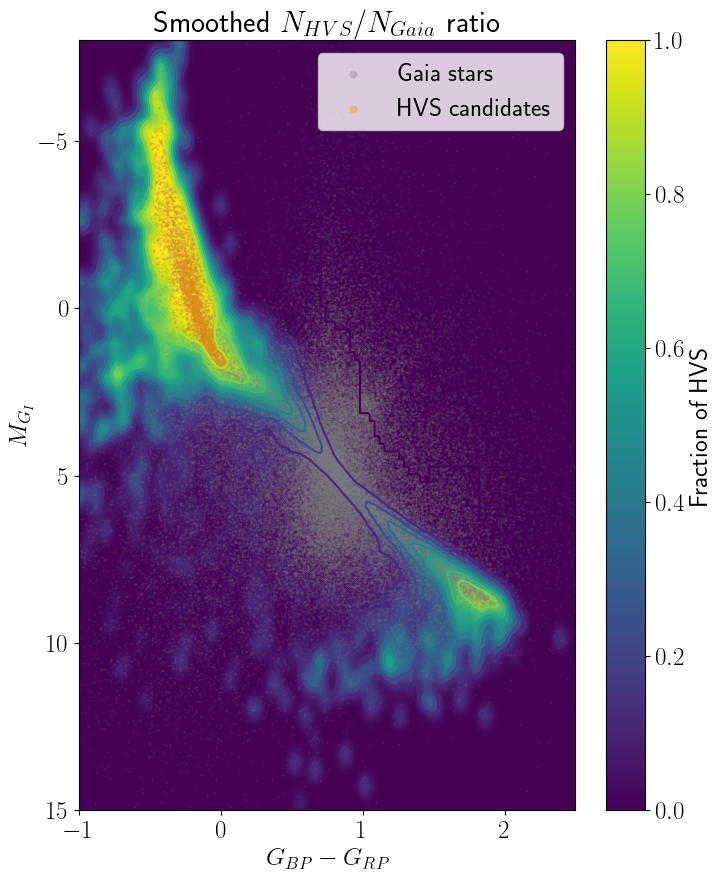

In [26]:
# Define levels for the contour
contour_levels = np.linspace(Z_smooth_oversampled.min(), Z_smooth_oversampled.max(), 10)

# Create figure
plt.figure(figsize=(8, 10))

# Plot the scatter data (optional)
plt.scatter(
    data_gaia_big['bp_rp_corr'], data_gaia_big['implied_M_g_corr'],
    s=0.1, alpha=0.3, color='gray', label='Gaia stars'
)
plt.scatter(
    filtered_df_test['bp_rp_corr'], filtered_df_test['implied_M_g_corr'],
    s=0.1, color='darkorange', alpha=0.3, label='HVS candidates'
)

cmap_name = 'viridis'

# Generate the contour plot from the oversampled, smoothed data
contour_lines = plt.contour(
    X_grid_new, Y_grid_new, Z_smooth_oversampled,
    levels=contour_levels, cmap=cmap_name, vmin=0, vmax=1
)
extent = [x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]]
plt.imshow(Z_smooth_oversampled, extent=extent, origin='lower', aspect='auto', cmap=cmap_name, vmin=0, vmax=1)

# Add a colorbar
norm = mcolors.Normalize(vmin=0, vmax=1)
sm = cm.ScalarMappable(norm=norm, cmap=cmap_name)

# make legend handles big


plt.colorbar(sm, label='Fraction of HVS', ax=plt.gca())
plt.xlim(-1, 2.5)
plt.ylim(15, -8)
plt.xlabel('$G_{BP} - G_{RP}$')
plt.ylabel('$M_{G_I}$')
plt.title('Smoothed $N_{HVS}$/$N_{Gaia}$ ratio')
plt.legend(loc = 'upper right', markerscale = 15)
plt.show()



## How can we also include RGB stars?

For some reason speedystar is not producing rgb stars, likely because as it is a very short time of the entire star lifetime, this stars are just not found there, as speedystar produces a relatively low number of stars. 

This does not mean that this stars do not exist. Just that it is not very likely to observe them in that evolutionary sequence. However, since they are brighter in that sequence, considering them will increase our volume significantly and therefore, the chance of finding a HVS.